In [108]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
# Reading the csv files
df=pd.read_csv("titanic.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
# Creqating a new column family in the dataset by adding SibSp column and Parch column
df["Family"]=df["SibSp"]+df["Parch"]
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [111]:
# ticket column can be ignored as it is a random number , we can skip the column in the for the analysis

In [112]:
df.Family.describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Family, dtype: float64

In [113]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [114]:
# Based on categories, we will analyze which category has high survivability
## Low,Mid,Mid-Hing,High
df["Fare_category"]=pd.cut(df.Fare,bins=[0,7.9,14.45,31.00,512],labels=["Low","Mid","Mid-High","High"])
df["Fare_category"].head(5)

0     Low
1    High
2     Mid
3    High
4     Mid
Name: Fare_category, dtype: category
Categories (4, object): [Low < Mid < Mid-High < High]

In [115]:
# comparing the fare with fare category
df[["Fare","Fare_category"]]

,Fare,Fare_category
0,7.2500,Low
1,71.2833,High
2,7.9250,Mid
3,53.1000,High
4,8.0500,Mid
...,...,...
886,13.0000,Mid
887,30.0000,Mid-High
888,23.4500,Mid-High
889,30.0000,Mid-High


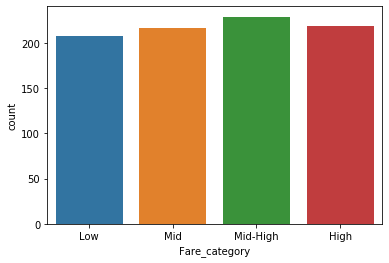

In [116]:
## visualizing the fare category
## count plor gives the entire count of the category--> category of survived and deceased
sns.countplot(x="Fare_category",data=df)
# People are approximately of equal majority

Text(0.5, 1.0, 'Survival based on fare category')

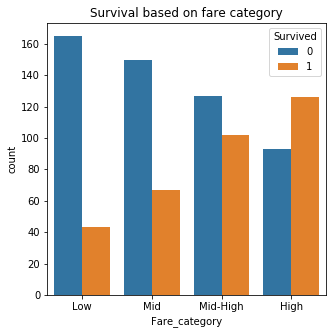

In [117]:
## visualizing the survived category
plt.figure(figsize=(5,5))
sns.countplot(x="Fare_category",hue="Survived",data=df).set_title("Survival based on fare category")

In [118]:
## Embarked Port --> from which port they have borded the ship
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [119]:
df.Embarked.value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

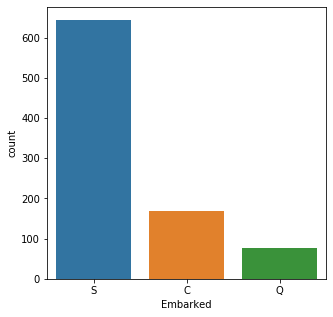

In [120]:
## Visualizing the Port column
plt.figure(figsize=(5,5))
sns.countplot(x="Embarked",data=df)

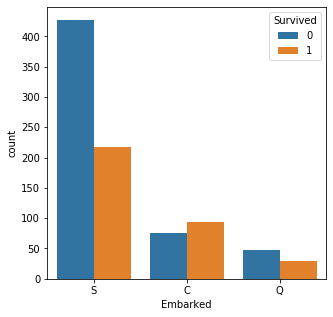

In [121]:
## visualizing the port columns ,s-
plt.figure(figsize=(5,5))
sns.countplot(x="Embarked",hue="Survived",data=df)

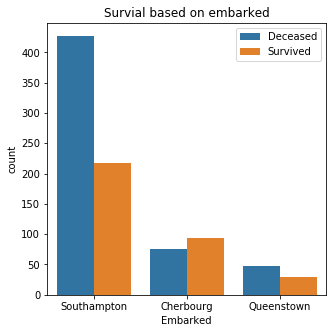

In [122]:
## visualizing the port columns ,s-
plt.figure(figsize=(5,5))
p=sns.countplot(x="Embarked",hue="Survived",data=df)
p.set_xticklabels(["Southampton","Cherbourg","Queenstown"])
p.set_title("Survial based on embarked")
p.legend(labels=["Deceased","Survived"])

In [123]:
# imputing with missing values
df.isnull().mean().sort_values(ascending=False)

Cabin            0.771044
Age              0.198653
Fare_category    0.020202
Embarked         0.002245
Family           0.000000
Fare             0.000000
Ticket           0.000000
Parch            0.000000
SibSp            0.000000
Sex              0.000000
Name             0.000000
Pclass           0.000000
Survived         0.000000
PassengerId      0.000000
dtype: float64

In [124]:
## Cabin --> 77% is missing we are going to create a new category as 
df.Cabin.fillna("NA",inplace=True)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High


In [125]:
df.Cabin.isnull().sum()

0

In [126]:
df.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [127]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [128]:
# Median -->Sorting the ages from 0-80 and replacing Nan with the median of age column
df.Age.fillna(df.Age.median(),inplace=True)
df.Age.isnull().sum()

0

In [129]:
## imputing embarked columns
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)
df.Embarked.isnull().sum()

0

In [130]:
df.Fare_category.isnull().sum()

18

In [131]:
## imputing fare columns
df.Fare_category.fillna(df.Fare_category.mode()[0],inplace=True)
df.Fare_category.isnull().sum()

0

In [132]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Family           0
Fare_category    0
dtype: int64

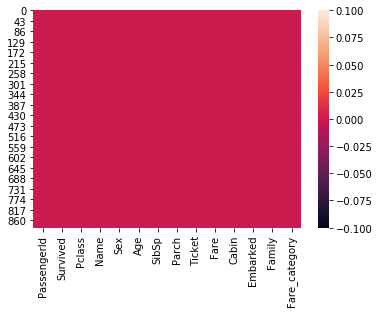

In [133]:
sns.heatmap(df.isnull())

In [134]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Mid
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,Mid


In [135]:
df["Age-Range"]=pd.cut(df.Age,bins=[0,10,20,30,40,60,80])
df[["Age","Age-Range"]].head()

,Age,Age-Range
0,22.0,"(20, 30]"
1,38.0,"(30, 40]"
2,26.0,"(20, 30]"
3,35.0,"(30, 40]"
4,35.0,"(30, 40]"


In [136]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_category,Age-Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,Low,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Mid,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,Mid,"(30, 40]"


In [137]:
dummy_set=pd.get_dummies(df.Fare_category,drop_first=True)
# n columns are created we need to have n-1 dummy columns
dummy_set

,Mid,Mid-High,High
0,0,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
886,1,0,0
887,0,1,0
888,0,1,0
889,0,1,0


In [139]:
df=pd.concat([df,dummy_set],axis=1)

In [140]:
# Ecndoinng of categorical variables
df = pd.concat([df,pd.get_dummies(df.Cabin,prefix="Cabin",drop_first=True),
                    pd.get_dummies(df.Embarked,prefix='Emb',drop_first=True),
                    pd.get_dummies(df.Fare_category,prefix="Fare",drop_first=True),
                    pd.get_dummies(df['Age-Range'],drop_first=True) ]   ,axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,1,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,1,0,0,0,0,1,0,0


In [141]:
# label encoder
from sklearn.preprocessing import LabelEncoder
df['Sex']=LabelEncoder().fit_transform(df.Sex)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,1,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0,1,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0,1,1,0,0,0,0,1,0,0


In [142]:
df.drop(['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Embarked','Cabin','Age-Range'],axis=1,inplace=True)
df


,Survived,Pclass,Sex,Family,Fare_category,Mid,Mid-High,High,Cabin_A14,Cabin_A16,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,0,3,1,1,Low,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,1,0,1,High,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,3,0,0,Mid,1,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,1,0,1,High,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,3,1,0,Mid,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,Mid,1,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
887,1,1,0,0,Mid-High,0,1,0,0,0,...,0,1,0,1,0,1,0,0,0,0
888,0,3,0,3,Mid-High,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
889,1,1,1,0,Mid-High,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [143]:
df.drop(["Fare_category"],axis=1,inplace=True)

In [145]:
df

,Survived,Pclass,Sex,Family,Mid,Mid-High,High,Cabin_A14,Cabin_A16,Cabin_A19,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,0,3,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,3,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,3,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
887,1,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
888,0,3,0,3,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
889,1,1,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [146]:
df.dtypes

Survived    int64
Pclass      int64
Sex         int32
Family      int64
Mid         uint8
            ...  
(10, 20]    uint8
(20, 30]    uint8
(30, 40]    uint8
(40, 60]    uint8
(60, 80]    uint8
Length: 164, dtype: object

In [148]:
## Standard scalar -> not required for this(Distance based algorithms)

In [153]:
## saperating the Input and output Data
X= df.drop("Survived",axis=1)
X.shape

(891, 163)

In [154]:
## output model
y=df.iloc[:,0]
y.shape

(891,)

In [155]:
## input and output into thraining data and testing data
# training --> we will train the model on training data
## testing --> check the performance of the model

In [163]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)
#to preent the random repetation to come 

In [164]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 163)
(223, 163)
(668,)
(223,)


In [165]:
X_train

,Pclass,Sex,Family,Mid,Mid-High,High,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
35,1,1,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
46,3,1,1,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
453,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
291,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
748,1,1,1,0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,3,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
767,3,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
72,2,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
235,3,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [169]:
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills'], 'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2], 'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
data.loc[2:7:3,"birds":"visits"]

AttributeError: 'dict' object has no attribute 'loc'